# Урок 8. Снижение размерности данных 

Большая размерность данных (под ней понимается размерность пространства признаков, то есть их количество) может серьезно усложнить задачу анализа таких данных и даже стать причиной некорректной работы некоторых алгоритмов. Кроме того, часто в исходных данных могут присутствовать лишние признаки, никак не связанные с целевой переменной. Поэтому часто встает задача понижения количества признаков, оставляя при этом самые значимые (наиболее сильно влияющие на значение целевого параметра) с отсечением менее значимых (наиболее слабо коррелирующих со значением целевого параметра) или с формированием новых признаков на основе старых. То есть ставится задача перехода от пространства большей размерности к пространству меньшей размерности с сохранением максимального количества полезной информации.

## Алгоритмы снижения размерности

Алгоритмы снижения размерности пространства признаков делятся на две группы - _отбор признаков_ (то есть отбрасывание наименее важных признаков) и _понижение размерности_ путем формирования новых признаков на основе старых.

### Отбор признаков

Самым простым и примитивным методом отбора является _одномерный отбор признаков_. Он заключается в оценке предсказательной силы каждого признака, то есть его информативности - насколько он коррелирует с целевой переменной. Затем отбираются либо заданное количество $k$ признаков, либо те признаки, информативность которых выше некоторого порога.

Оценка предсказательной силы признака (или степени связи этого признака и целевой переменной) может проводиться разными методами, например:

- в случае регрессии - _корреляция_ $$R_{j} = \frac{\sum_{i=1}^{l}(x_{ij} - \bar{x}_{j})(y_{i} - \bar{y})}{\sqrt{\sum_{i=1}^{l}(x_{ij} - \bar{x}_{j})^{2}\sum_{i=1}^{l}(y_{i} - \bar{y})^{2}}},$$ где $\bar{x_{j}}$ и $\bar{y}$ - среднее значение $j$-го признака и целевой переменной, соответственно. Чем больше по модулю корреляция ($\pm 1$), тем информативнее признак. Следует заметить, что этот метод учитывает только линейную связь между признаком и целевой переменной.


- в случае задачи классификации - *взаимная информация (mutual information)*, моделирующая корреляцию между признаками и классами. Она использует в расчете вероятность того, что одновременно значение $j$-го признака $x_{ij}$ равно числу $v$ и значение целевой переменной $y_{i}=k$, или, другими словами, долю таких объектов от общего количества объектов в выборке $P(x=v,y=k)$. Тогда взаимная информация будет находиться как $$MI_{j}=\sum_{v \in X}\sum_{k \in Y}P(x=v,y=k)\text{log}\frac{P(x=v,y=k)}{P(x=v)P(y=k)}.$$ Здесь $P(x=v)$ и $P(y=k)$ - доли объектов, на которых значение признака равно $v$ и значение целевой переменной равно $k$, соответственно. Если признак и целевая переменная независимы, то взаимная информация обращается в ноль. В отличие от предыдущего метода, этот метод позволяет находять произвольные зависимости (в т.ч. нелинейные) в пространстве произвольной размерности.

Такие методы позволяют оценить важность исключительно каждого признака отдельно, без учета влияния комбинаций признаков на целевую переменную, поэтому они и называются одномерными. На практике зачастую признаки влияют именно в совокупности, и по отдельности могут ошибочно быть расценены как некоррелирующие с целевой переменной, поэтому одномерные методы отбора не являются оптимальным методом в большинстве случаев.

Отдельной группой методов можно назвать так называемые *переборные методы*, которые дискретно оценивают качество модели, обученной на различных подмножествах признаков. При этом происходит полный перебор всех возможных вариантов. Обычно такие алгоритмы делятся на _жадные (greedy)_ и _нежадные (non-greedy)_. Полный список их можно найти в дополнительных материалах.

Жадность алгоритмов заключаются в том, что если один из признаков включен в подмножество (или исключен в случае исключающего метода), в следующих итерациях поиска он уже не учитывается, так что алгоритм работает на меньшем объеме данных. Известные алгоритмы этого типа - _жадное включение_ и _жадное исключение_. В случае жадного включения на первой итерации аналогично одномерному отбору признаков находится признак, обладающий наибольшей предсказательной силой и добавляется в формирующуееся подмножество $\{i_{1}\}$. Далее происходит перебор оставшихся признаков с попеременным добавлением каждого из них в подмножество к первому и оценкой качества получаемой модели, обученной на подмножестве из этих двух признаков $\{i_{1}, i_{2}\}$. В итоге в подмножестве остается тот признак, при добавлении которого получается наилучшее качество. Далее эта процедура повторяется до момента, пока ошибка получаемой модели уменьшается. На каждой итерации в подмножество добавляется один признак, максимально улучшающий работу модели. Если на какой-то итерации при добавлении признаков ошибка не уменьшается, процесс останавливается.

Плюсом такого алгоритма является относительная быстрота и возможность учета некоторых взаимодействий между признаками (как раз то, чего лишен одномерный отбор). Минусом же можно назвать вероятность застрять в локальном минимуме ошибки, если такой есть. В случае же когда есть единственный глобальный минимум, алгоритм найдет оптимальное решение.

Есть также модификации этого алгоритма с многократным проходом по выборке и поочередным включением/исключением признаков из подмножества для учета совокупного влияния признаков.

Примером нежадного алгоритма может быть простой последовательный полный перебор всех возможных подмножеств признаков. Такой подбор позволяет найти наиболее оптимальное подмножество признаков, но, очевидно, он является достаточно трудоемким (нужно перебрать $2^{n}$ вариантов, где $n$ - число признаков), поэтому подходит только для датасетов с небольшим количеством признаков.

Еще одна группа методов отбора признаков - _встроенные в модели_. Они используют эвристики, заложенные в обучающие модели, для оценки важности признаков.

- Например, в случае работы с линейными моделями мы имеем зависимость целевой переменной от взвешенной суммы признаков $$a(x) = \sum_{i=1}^{n}w_{i}x^{i}.$$ Здесь, если признаки масштабированы, веса будут являться показателями информативности признаков: чем больше вес, тем больший вклад данный признак вносит в значение целевой переменной. На основе этого показателя можно проводить отбор признаков. Также, вспоминая уроки по линейным моделям, можно упомянуть, что использование $L_{1}$-регуляризации приводит к занулению весов наименее важных признаков, то есть к их отбрасыванию, при этом больший коэффициент регуляризации будет приводить к большему количеству зануленных весов.

- В случае использования решающих деревьев и их композиций, где в каждой вершине происходит разбиение на два поддерева путем сравнивания значения одного признака с некоторым значением порога, важность признака можно оценивать по тому, насколько он уменьшает значение критерия информативности, по которому оценивается качество разбиения: $$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r}),$$ где $X_{m}$ - множество объектов, попавших в вершину на данном шаге, $X_{l}$ и $X_{r}$ - множества, попадающие в левое и правое поддерево, соответственно, после разбиения. $H(X)$ - критерий информативности. 
    
    Чем сильнее падает критерий информативности при разбиении по данному признаку (то есть чем выше $Q$), тем этот признак важнее. Таким образом, важность $j$-го признака можно оценить путем вычисления суммы уменьшений критерия информативности по всем вершинам, в которых делалось разбиение по данному признаку. Чем больше эта сумма, тем важнее данный признак был при построении дерева. В случае композиций деревьев этот показатель суммируется по всем деревьям.

### Понижение размерности

Кроме отбора признаков, который не всегда оптимален в плане сохранения максимума полезной информации, существуют еще методы понижения размерности путем формирования новых признаков на основе старых. Новых признаков при использовании такого метода должно быть меньше, чем исходных, при условии сохранения максимально возможного количества информации из исходных признаков. Например, объединение нескольких признаков в линейную комбинацию:

$$z_{ij}=\sum_{k=1}^{n}w_{jk}x_{ik},$$

где $x_{ij}$ - исходные признаки, $z_{ij}$ - новые принаки.

Простейшим методов такого понижения размерности является метод *случайных проекций*, который заключается в преобразованиях, сохраняющих расстояния и снижающих размерности. Существование таких преобразований доказано для выборок, в которых объектов меньше, чем признаков. Веса при всех признаках в таком методе можно выбирать случайно. При этом не факт, что мы попадем в оптимальное преобразование, но практика показывает, что метод работает, если размерность нового пространства признаков

$$d > \frac{8\text{ln}l}{\varepsilon^{2}},$$

где $l$ - количество объектов, $\varepsilon$ - максимальное изменение расстояния между объектами (лемма о малом искажении или лемма Джонсона-Линденштрауса).

In [ ]:
12:05

### Метод главных компонент (PCA)

Одним из наиболее известных и широко применяемых методов понижения размерности является _метод главных компонент (principal component analysis, PCA)_. Он заключается в приближении матрицы признаков матрицей меньшего ранга - так называемом низкоранговом приближении.

В совсем общем виде это можно представить как предположение о том, что все наши наблюдения скорее всего выглядят как некий эллипсоид в подпространстве нашего исходного пространства и наш новый базис в этом пространстве совпадает с осями этого эллипсоида. Это предположение позволяет нам одновременно избавиться от сильно скоррелированных признаков, так как вектора базиса пространства, на которое мы проецируем, будут ортогональными.


В общем случае размерность этого эллипсоида будет равна размерности исходного пространства, но наше предположение о том, что данные лежат в подпространстве меньшей размерности, позволяет нам отбросить "лишнее" подпространство в новой проекции, а именно то подпространство, вдоль осей которого эллипсоид будет наименее растянут. Мы будем это делать "жадно", выбирая по-очереди в качестве нового элемента базиса нашего нового подпространства последовательно ось эллипсоида из оставшихся, вдоль которой дисперсия будет максимальной.

<img src="data/pca.PNG" style="width: 400px;">

Запишем показанную ранее формулу линейного преобразования признаков в матричном виде:

$$Z = XW^{T},$$

где $X$ - матрица "объекты-признаки", где по строкам отложены объекты, а по столбцам - значения признаков, $Z$ - матрица новых признаков, $W^{T}$ - транспонированная матрица весов. Приближение заключается формировании новой матрицы признаков $\tilde{X}=ZW\approx X$ с возможностью восстанавливания старых признаков по новым с максимальным уровнем точности, или, если говорить иначе, чтобы их различие было минимальным:

$$\|ZW - X\|^{2} \rightarrow \underset{Z, W}{\text{min}}.$$

При этом метод главных компонент предполагает, что матрица весов должна быть ортогональной, то есть произведение $WW^{T}$ должно равняться единичной матрице. Восстановленная матрица $ZW$ может иметь ранг меньший, чем исходная $X$, поэтому приближение будет называться низкоранговым.

Геометрически метод можно представить как проецирование признаков на гиперплоскость с максимизацией дисперсии получаемой выборки.

In [ ]:
10 Признаков -> 2 признака , d = 2
rank(X) = 5


Если ранг матрицы исходных признаков $rank(X) \geq d$, где $d$ - число новых признаков, то минимум функционала различия, описанного выше, достигается тогда, когда в качестве строк матрицы $W$ используются собственные векторы матрицы $X^{T}X$ , соответствующие максимальным собственным значениям $\lambda_{1},...,\lambda_{d}$. Максимальные собственные значения и называются __главными компонентами__, от чего пошло название метода. Первая главная компонента соответствует максимальному собственному значению и т.д.

(Чтобы освежить память — у матриц как у линейных операторов есть такое интересное свойство как собственные значения и собственные вектора (eigenvalues и eigenvectors). Эти штуки замечательны тем, что когда мы нашей матрицей действуем на соответствующее линейное пространство, собственные вектора остаются на месте и лишь умножаются на соответствующие им собственные значения. То есть определяют подпространство, которое при действии этой матрицей как линейным оператором, остаётся на месте или "переходит в себя")

Некоторые полезные свойства метода:

- Матрица $Z$ при этом будет такой, что $Z^{T}Z = \Lambda = diag(\lambda_{1},...,\lambda_{d})$.


- Минимизированный функционал ошибки будет равен $$\|ZW - X\|^{2} = \|X\|^{2} - tr\Lambda,$$ где $tr\Lambda,$ - след матрицы $\Lambda$, то есть сумма всех собственных значений $\lambda_{1},...,\lambda_{d}$, а $\|X\|^{2}$ - сумма всех собственных значений исходной матрицы $\lambda_{1},...,\lambda_{n}$, таким образом $$\|ZW - X\|^{2} = \sum_{j=d+1}^{n}\lambda_{j},$$ то есть значение функционала ошибки будет равно сумме собственных значений, которые не были взяты в получаемое разложение. Поэтому логично брать в разложение максимальные собственные значения, оставляя минимальные.


- Матрица $X^{T}X$ - матрица ковариации, то есть матрица, которая характеризует дисперсию выборки. Дисперсия выборки после проецирования будет равна собственному значению $\lambda$, поэтому логично, что первым берется собственный вектор, соответствующий максимальному собственному значению - нам нужно сохранить максимум дисперсии.

Таким образом, для реализации метода главных компонент нужно :
- найти собственные значения матрицы $X^{T}X$;
- отобрать $d$ максимальных;
- составить матрицу $W^{T}$, столбцы которой будут являться собственными векторами, соответствующими отобранным собственным значениям, расположенным в порядке убывания;
- получить новую матрицу "объекты-признаки", умножив исходную матрицу $X$ на матрицу весов $W$ (получим проекцию наших данных в ортогональном базисе этих компонент):

$$Z=XW.$$

### Сингулярное разложение (SVD) 

<img src="data/svd.PNG" style="width: 400px;">

Сформулировав принцип реализации метода главных компонент, нельзя не заметить его родство с _сингулярным разложением матриц (singular value decomposition, SVD)_. Вспомним, что сингулярное разложение матрицы - это разложение вида

$$X=UDV^{T},$$

где столбцы ортогональной матрицы $U$ - это собственные векторы матрицы $XX^{T}$, столбцы ортогональной матрицы $V$ - собственные векторы матрицы $X^{T}X$, а на главной диагонали диагональной матрицы $D$ расположены собственные значения матриц $XX^{T}$ и $X^{T}X$ (они равны и также называются сингулярными числами матрицы $X$).

#####  Зачем? 
Исходная матрица большого размера, но малого ранга, её разложенная версия имеет гораздо меньшее число параметров.

Если число новых признаков $d$ равно старому числу признаков $n$, то можно приравнять разложения

$$X=ZW=UDV^{T}.$$

При этом матрицы $W$ и $V^{T}$ состоят из собственных векторов матрицы $X^{T}X$, то есть они равны при $Z=UD$.

Получается, что метод главных компонент - в своем роде "урезанная версия" сингулярного разложения, из которого убрали минимальные собственные значения с соответствующими собственными векторами. 
Таким образом, для реализации понижения размерности методом главные компонент с помощью SVD нужно:
- найти сингулярное разложение вектора $X$;
- сформировать из столбцов матрицы $V$, соответствующих $d$ наибольшим сингулярным числам, матрицу весов $W$;
- получить новую матрицу "объекты-признаки", умножив исходную матрицу $X$ на матрицу весов $W$:

$$Z=XW.$$

Для закрепления теории реализуем PCA с помощью Python.

In [186]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import random

In [187]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
# X

In [188]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]
X = pd.DataFrame(X_).copy()
# print(X.shape)
print(X[:5])
X['index'] = np.linspace(0,X.shape[0],X.shape[0]).astype(int)
print(X)
X = X.values
# X
# random.shuffle(X)
# X_train,X_test = [X[:int(len(X)*0.7)],X[int(len(X)*0.7):]].copy()
# index_train = X_train['index'].copy()
# index_test = X_test['index'].copy()
# X_train.drop('index', axis = 1, inplace=True)
# X_test.drop('index', axis = 1, inplace=True)

          0         1         2         3
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444
            0         1         2         3  index
0   -0.900681  1.019004 -1.340227 -1.315444      0
1   -1.143017 -0.131979 -1.340227 -1.315444      1
2   -1.385353  0.328414 -1.397064 -1.315444      2
3   -1.506521  0.098217 -1.283389 -1.315444      3
4   -1.021849  1.249201 -1.340227 -1.315444      4
..        ...       ...       ...       ...    ...
145  1.038005 -0.131979  0.819596  1.448832    145
146  0.553333 -1.282963  0.705921  0.922303    146
147  0.795669 -0.131979  0.819596  1.053935    147
148  0.432165  0.788808  0.933271  1.448832    148
149  0.068662 -0.131979  0.762758  0.790671    150

[150 rows x 5 columns]


In [189]:
random.shuffle(X)
X = pd.DataFrame(X).copy()

X_train,X_test = X[:int(len(X)*0.7)],X[int(len(X)*0.7):]
index_train = list(X_train[4].astype(int).copy())
index_test = list(X_test[4].astype(int).copy())
X_train.drop(4, axis = 1, inplace=True)
X_test.drop(4, axis = 1, inplace=True)

/home/andrei/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [190]:
# Найдем собственные векторы и собственные значения (англ. Eigenvalues)
 
covariance_matrix = X_train[:-1].T.dot(X_train[:-1])

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения в порядке убывания:
(457.6198999963641, array([-0.48642247,  0.33833585, -0.58093226, -0.55806786]))
(102.49877625020122, array([0.41501229, 0.90055104, 0.07683725, 0.10425286]))
(5.9746630605428885, array([ 0.7645704 , -0.26809463, -0.33285597, -0.48245651]))
(1.2092910327306967, array([ 0.08117941, -0.05159396, -0.73879676,  0.66702873]))


Оценим долю дисперсии, которая описывается найденными компонентами.

In [191]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[80.66592247637384, 18.06774211302352, 1.0531703434838309, 0.21316506711881084]
Кумулятивная доля дисперсии по компонентам 
[ 80.66592248  98.73366459  99.78683493 100.        ]


Таким образом, первая главная компонента описывает почти 73% информации, а первые две в сумме - 95.8%. В то же время последняя компонента описывает всего 0.5% и может быть отброжена без страха значительных потерь в качестве нашего анализа. Мы отбросим последние две компоненты, оставив первые две.

In [192]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[-0.48642247  0.41501229]
 [ 0.33833585  0.90055104]
 [-0.58093226  0.07683725]
 [-0.55806786  0.10425286]]


In [193]:
# Сформируем новую матрицу "объекты-признаки"
# W как матрица перехода между 2мя базисами
Z = X_train.values.dot(W)

In [194]:
Z[:10]

array([[ 2.29556528,  0.30375353],
       [ 2.02402373, -0.83333847],
       [ 2.29556528,  0.30375353],
       [ 2.33068761, -0.52367013],
       [ 2.33068761, -0.52367013],
       [ 2.43238787,  0.46077131],
       [ 2.33068761, -0.52367013],
       [ 2.43238787,  0.46077131],
       [ 2.43238787,  0.46077131],
       [ 2.43891564, -0.14125815]])

In [195]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(X_train)

In [196]:
XPCAreduced[:10]

array([[-0.64468549,  0.07667188],
       [ 0.26062726, -0.66175713],
       [-0.64468549,  0.07667188],
       [-0.17827922, -0.61195627],
       [-0.17827922, -0.61195627],
       [-0.85228987,  0.11322962],
       [-0.17827922, -0.61195627],
       [-0.85228987,  0.11322962],
       [-0.85228987,  0.11322962],
       [-0.50335234, -0.38534974]])

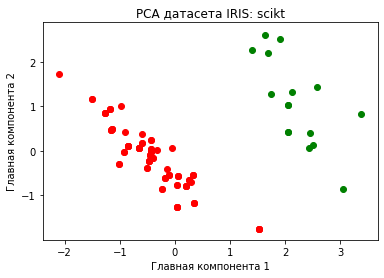

In [197]:
plt.figure()
y = iris.target[index_train]
# print(y.shape)
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(XPCAreduced[y==i, 0], XPCAreduced[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS: scikt')
plt.show()

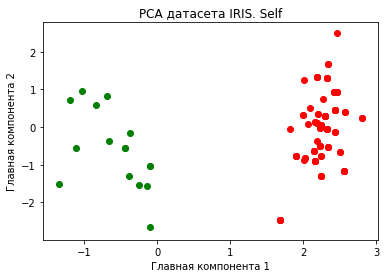

In [198]:
plt.figure()
y_train = iris.target[index_train]
# print(y.shape)
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y_train==i, 0], Z[y_train==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS. Self')
plt.show()

In [204]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [205]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes= {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for index,d in enumerate(sorted(test_distances)[0:k]):
            #  вес подсчитывается как отношение разницы расстояния для каждого k-элемента и мин.расстояния
            #  к разнице между макс. и мин. расстоянием
            weight = (d[0]- min(np.array(test_distances)[:,0]))/ (max(np.array(test_distances)[:,0]) - min(np.array(test_distances)[:,0]))
            # вес самого близкого к минимальному расстоянию элементу должен быть больше, поэтому беру обратную дробь
            if (d[0]- min(np.array(test_distances)[:,0]))!=0:
                classes[d[1]] += 1/weight
            else:
                classes[d[1]] += 1
#         print(classes)    

#         print(sorted(classes, key=classes.get)[-1])    
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
#     print(answers)
    return answers

Напишем функцию для вычисления точности

In [206]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [210]:
k = 3

y_pred = knn(X_train.values, y_train, X_test.values, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.844


Построим график распределения классов.

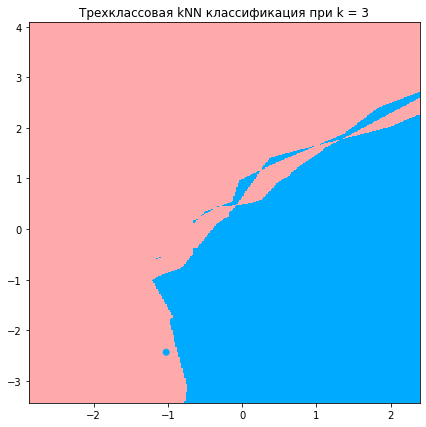

In [218]:
from matplotlib.colors import ListedColormap
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()
get_graph(X_train.values, y_train, k)

In [219]:
k = 3

y_pred = knn(Z, y_train, X_test.values.dot(W), k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.844


Построим график распределения классов.

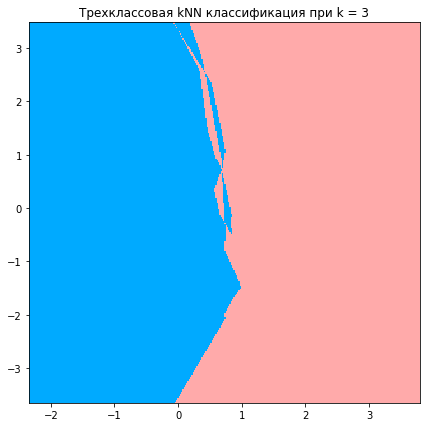

In [220]:
from matplotlib.colors import ListedColormap
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()
get_graph(Z, y_train, k)

In [249]:
U, s, V = np.linalg.svd(X_train, full_matrices=False)
# U, s, V

In [289]:
n = 1

X_train_svd = U[:,:n]@ np.diag(s)[:n] @ V[:n,:].T
X_train_svd

array([[-1.12338746],
       [-0.99290932],
       [-1.12338746],
       [-1.1426319 ],
       [-1.1426319 ],
       [-1.19016725],
       [-1.1426319 ],
       [-1.19016725],
       [-1.19016725],
       [-1.19501659],
       [-0.99290932],
       [-1.09856491],
       [-1.05792122],
       [-1.25171078],
       [-1.06669327],
       [-1.05041779],
       [-1.14052215],
       [-1.05041779],
       [-1.12338746],
       [-1.13134524],
       [-1.14089101],
       [-1.05792122],
       [-1.06669327],
       [-1.09856491],
       [-1.10049023],
       [-1.14052215],
       [-1.13134524],
       [-1.19501659],
       [-1.05792122],
       [-1.14089101],
       [-1.05660767],
       [-1.05041779],
       [-1.07816435],
       [-1.25171078],
       [-1.06669327],
       [-1.10049023],
       [-1.12338746],
       [-1.10164635],
       [-0.89160379],
       [-1.0695048 ],
       [-1.18443171],
       [-0.82532328],
       [-1.19016725],
       [-1.20043728],
       [-1.25517915],
       [-1

In [304]:
k = 5

y_pred = knn(X_train_svd, y_train, X_test.values.dot(V[:n,:].T), k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.844


Таким образом, мы перешли от четырехмерного пространства признаков к двумерному и при этом классы остались разделимы в пространстве, то есть классификация возможна.

PCA наиболее хорошо работает, когда собственные значения $\lambda$ на каком-то участке графика распределения убывают скачкообразно (критерий крутого склона), другими словами, если существуют предпосылки к тому, что следует решать задачу в пространстве меньшей размерности. Если же они убывают монотонно, следует рассмотреть вариант использования других методов работы с пространством признаков.

## Литература

1. [Методы отбора признаков](https://habr.com/ru/company/aligntechnology/blog/303750/)
2. [Взаимная информация](https://ru.wikipedia.org/wiki/%D0%92%D0%B7%D0%B0%D0%B8%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F)
3. [Методы понижения размерности](http://www.machinelearning.ru/wiki/images/0/06/SLT%2C_lecture_8.pdf)
4. [Лемма о малом искажении](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BC%D0%BC%D0%B0_%D0%BE_%D0%BC%D0%B0%D0%BB%D0%BE%D0%BC_%D0%B8%D1%81%D0%BA%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8)
5. [PCA from Scratch in Python](https://github.com/bhattbhavesh91/pca-from-scratch-iris-dataset)

## Summary

* Снижать размерность данных можно за счет
    * отбора признаков (корреляция, взаимная информация, вес коэфф. регрессии, feature_importances_ и др.)
    * снижения размерности (случайные проекции, PCA, ICA (Independent Component Analysis), NMF (Non-negative Matrix Factorization) и др.)
* Уменьшение размерности 
    * ускоряет работу моделей
    * улучшает интерпретируемость решения
    * упрощает поддержку решения
    * улучшает точность модели, если были удалены шумовые и нерелевантные признаки
* В основе PCA используется понятие [_собственного вектора_](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%B1%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80) - это вектор, умножение которого на матрицу даёт коллинеарный вектор - тот же вектор, умноженный на некоторое число, называемое _собственным значением_

In [ ]:
W*x = lambda*x

In [ ]:
m*n
m - obj
n - features
rank?
rank [0:n]

5
4

## Домашнее задание

1. Обучить любую модель классификации на датасете IRIS до применения PCA (d = 2) и после него. Сравнить качество классификации по отложенной выборке.

2*. Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

## Курсовой проект

https://www.kaggle.com/c/tutors-expected-math-exam-results регрессия

https://www.kaggle.com/c/choose-tutors классификация

## Q&A

__1. Можно ли отобрать наиболее значимые признаки с помощью PCA?__

Да, но следует помнить, что PCA не выбирает из имеющихся признаков наиболее значимые, а строит новые, которые "учтут максимум информации" из имеющихся признаков, создав тем самым новое уменьшенное признаковое пространство.

__2. Какие применения на практике есть у матричных разложений, например, SVD?__

Сингулярное разложение широко применяется, в частности, при сжатии данных, обработке сигналов, численных итерационных методах для работы с матрицами, латентно-семантическом анализе, а также в _рекомендательных системах_. Так, имея разреженную матрицу "Users"-"Movies" с оценками фильмов пользователями, мы хотим рекомендовать пользователям новые фильмы, предсказывая оценку i-го пользователя j-му фильму. Для этого мы можем сделать SVD разложение этой матрицы и затем вектор, описывающий i-го пользователя, умножить на вектор, описывающий j-ый фильм. Так мы предскажем оценку, которую данный пользователь поставит этому фильму. Значит, можем сделать это для всех пользователей/фильмов? :)

Материалы на тему: [ссылка 1](https://habr.com/ru/company/yandex/blog/241455/), [ссылка 2](https://habr.com/ru/company/surfingbird/blog/139863/), [ссылка 3](https://habr.com/ru/company/okko/blog/454224/).

__3. Как вручную найти собственные вектора и собственные значения?__

Рассмотрим эту задачу на примере следующей матрицы:

$$A = \begin{Vmatrix}4 & -3 & 3\\1 & 2 & 1\\1 & 1 & 2\end{Vmatrix}$$

Составим характеристическое уравнение:
$$det(A-\lambda E) = \begin{Vmatrix}4-\lambda & -3 & 3\\1 & 2-\lambda & 1\\1 & 1 & 2-\lambda\end{Vmatrix} = 0$$

Расписываем детерминант (определить) матрицы:

$$(4-\lambda)(2-\lambda)^2-3-3-(4-\lambda)+3(2-\lambda)+3(2-\lambda) = 0$$
$$(\lambda-1)(\lambda^2-7\lambda-18) = 0$$

Отсюда получаем совокупность уравнений:

$$\left[ 
    \begin{gathered}
        \lambda-1 = 0 \Rightarrow \lambda = 1
        \\
        \lambda^2-7\lambda-18 = 0 \Rightarrow D = (-7)^2-4*18=-23 < 0
    \end{gathered}
\right.$$

Получили, что характеристическое уравнение имеет только один действительный корень $\lambda=1$, а матрица $A$ только одно собственное значение.

Найдём собственный вектор для полученного собственного значения, решая уравнение:

$$\begin{Vmatrix}4-\lambda & -3 & 3\\1 & 2-\lambda & 1\\1 & 1 & 2-\lambda\end{Vmatrix} * \begin{Vmatrix}x_1\\x_2\\x_3\end{Vmatrix} = \begin{Vmatrix}0\\0\\0\end{Vmatrix}$$

Его можно решать в матричном виде, а можно, подставив найденное значение $\lambda = 1$, переписать в виде системы уравнений:

$$
\begin{cases}
    3 x_1 - 3 x_2 - 3x_3 = 0,
    \\
    x_1 + x_2 + x_3 = 0,
    \\
    x_1 + x_2 + x_3 = 0.
    \end{cases}
$$

Отсюда получаем решение системы:

$$
\begin{cases}
    x_1 = 0,
    \\
    x_3 = -x_2.
    \end{cases}
$$

Собственный вектор равен:

$$\overrightarrow{x} = \begin{Vmatrix}0\\x_2\\-x_2\end{Vmatrix} = C*\begin{Vmatrix}0\\1\\-1\end{Vmatrix}$$

__4. Какими свойствами обладают собственные вектора?__

Пусть $A: X_n → X_n$ — линейный оператор.

1. Все собственные векторы линейного оператора, соответствующие одному и тому же собственному значению, вместе с нулевым вектором образуют линейное пространство.
2. Собственные векторы линейного оператора, соответствующие различным собственным значениям, линейно независимы.
3. Если линейный оператор $A: X_n → X_n$ имеет n различных (вещественных) собственных значений, то собственные векторы, соответствующие этим собственным значениям, образуют базис в $X_n$. Такой базис называется собственным базисом линейного оператора $A$.
4. Матрица $A$ линейного оператора $A: X_n → X_n$ в некотором базисе $x_1, x_2, ..., x_n$ имеет диагональный вид тогда и только тогда, когда этот базис собственный, причем диагональные элементы этой матрицы — собственные значения оператора $λ_1, λ_2, ..., λ_n$.

__5. С отбором признаков понятно, но что с предобработкой данных, напомните, есть какой-то "джентльменский набор"?__

Методы предварительной обработки данных:

- __очистка данных__ - является процессом обнаружения и исправления или удаления ошибочных записей данных
- __нормализация данных__ - используется для стандартизации диапазона значений независимых переменных или признаков данных (сведение к интервалам [0, 1] или [-1, +1])
- __преобразование данных__ - является процессом приведения данных в формат, который ожидают люди
- __выделение признаков__ - является процессом преобразования входных данных в набор признаков, которые могут хорошо представлять входные данные
- __уплотнение данных__ - является преобразованием числовых данных в исправленный, упорядоченный и упрощённый вид, что приводит к уменьшению количества или размерности данных

Методы обнаружения выбросов:

- __статистические подходы__ (box-plot, гистограмма и т.д.)
- __модельные тесты__ (строим модель, описывающую данные, те объекты, что сильно выбиваются - выбросы)
- __метрические методы__ (мерой аномальности может служить, например «расстояние до k-го соседа»)
- __методы машинного обучения__
    - __AdaBoost__ - выбросы набирают вес при построении новых моделей, решение - исключаем объекты из выборки, которые быстро набирают вес
    - __метод опорных векторов для одного класса (OneClassSVM)__ - скорее алгоритм поиска новизны, а не выбросов, т.к. «затачивается» под обучающую выборку
    - __изолирующий лес (IsolationForest)__ - одна из вариаций случайного леса, каждое дерево строится до исчерпании выборки, при разбиении выбирается случайные признак и расщепление, для каждого объекта мера его нормальности – среднее арифметическое глубин листьев, в которые он попал (изолировался)
    - __эллипсоидальная аппроксимация данных (EllipticEnvelope)__ - облако точек моделируется как внутренность эллипсоида, метод хорошо работает только на одномодальных данных, а совсем хорошо – на нормально распределённых    

Восстановление данных - заполнение пропусков:

- __"средние"__: мат. ожидание, медиана, мода
- __предсказание моделью__ (например, линейная регрессия)

__6. Какие способы подбора гиперпараметров существуют, помимо простого перебора?__

- "Эль Классико"
    - __GridSearchCV__ - поиск по решетке, все комбинации
    - __RandomizedSearchCV__ - случайный поиск
- Продвинутые методы
    - __байесовская оптимизация__ - стохастическая модель функции отображения из значений гиперпараметра в целевую функцию, ищется оптимальный набор гиперпараметров
    - __оптимизация на основе градиентов__ - вычисление градиента гиперпараметров и оптимизация их с помощью градиентного спуска
    - __эволюционные алгоритмы__ - начинаем со случайных, оцениваем пригодность, "скрещиваем" и "мутируем" слабые, повторяем до сходимости

Популярные библиотеки:

- __HyperOpt__ - автоматическая оптимизация гиперпараметров - https://github.com/hyperopt/hyperopt
- __AutoML__ - автоматизирование workflow ML задач - http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
- __Spearmint__ и __BayesOpt__ - байесовская оптимизация - https://github.com/HIPS/Spearmint, https://rmcantin.bitbucket.io/html/

**7. Как будет работать случайный лес с категориальными признаками?**

Категориальные признаки нельза преобразовать в dummy переменные, потому что они будут разреженными (там будет много нулей). А мы уже говорили, что случайному лесу тяжело находить зависимость целевой переменной от разреженного признака, плюс теряется "мощь" признака, так как один будет размазываться по нескольким
https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/

В случае с категориальными переменными можно построить n-арное дерево

Также в ансамблях (типа Catboost, LGBM) есть возможность явно указать категориальные признаки и они будут правильно учтены в деревьях без дамми (one hot encoding)

**8. Метод локтя и Дендрограммы** 

1. Метод Локтя
<img src="data/elbow.png" style="width: 600px;">
2. Дендрограммы
<img src="data/dendro.png" style="width: 600px;">
https://wiki.loginom.ru/articles/dendrogram.html